Table of Contents:

FOUNDATIONS:
- [1. Function in Math Context](#1-function-in-math-context)
- [2. Derivative of a Function](#2-derivative-of-a-function)
- [3. Nested Function](#3-nested-function)
- [4. Chain Rule](#4-chain-rule)
- [5. Functions with Multiple Inputs](#5functions-with-multiple-inputs)
- [6. Derivatives of Functions with Multiple Inputs](#6-derivatives-of-functions-with-multiple-inputs)
- [7. Functions with Multiple Vector Inputs](#7-functions-with-multiple-vector-inputs)
- [8. Derivatives of Functions with Multiple Vector Inputs](#8-derivatives-of-functions-with-multiple-vector-inputs)
- [9. Vector Functions and Their Derivatives: One Step Further](#9-vector-functions-and-their-derivatives-one-step-further)
- [10. Vector Functions and Their Derivatives: The Backward Pass](#10-vector-functions-and-their-derivatives-the-backward-pass)
- [11. Computational Graph with 2D Matrix Inputs](#11-computational-graph-with-2d-matrix-inputs)

In [2]:
from typing import Callable, List, Sequence
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("classic")

### 1. Function in Math Context

#### List of Well-Known Function in Math

In [3]:
def square(x: np.ndarray):
    return np.power(x, 2)

def cubic(x: np.ndarray):
    return np.power(x, 3)

def square_root(x: np.ndarray):
    return np.sqrt(x)

def absolute(x: np.ndarray):
    return np.abs(x)

def identity(x: np.ndarray):
    return x * 1

test the function

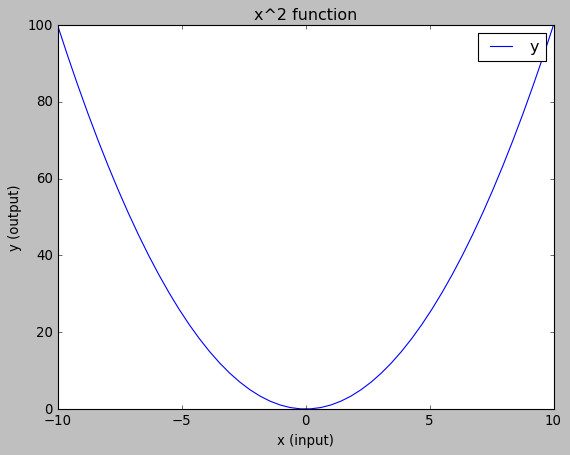

In [4]:
# apply the function
x = np.linspace(-10, 10, 50)
y = square(x)

plt.plot(x, y, label='y')
plt.title("x^2 function")
plt.ylabel("y (output)")
plt.xlabel("x (input)")
plt.legend()
plt.show()

### 2. Derivative of a Function

In [5]:
def derivative(func: Callable[[np.ndarray], np.ndarray], input: np.ndarray, delta: float = 0.001):
    return (func(input + delta) - func(input - delta)) / (2 * delta)

Example 1:

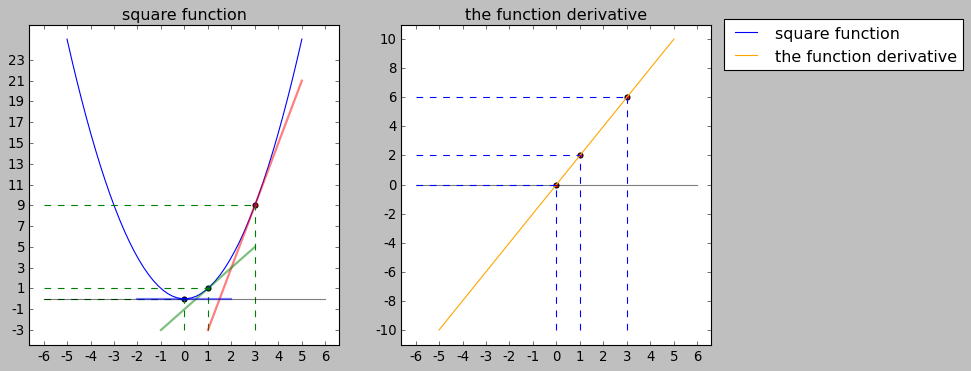

In [6]:
# generate our input
x = np.linspace(-5, 5, 50)

# the function
y = square(x)

# the derivative of the function
y_deriv = derivative(square, x)

# plot the result
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

# set for x ticks
xticks = np.arange(-6, 7, 1)

# set for y ticks
yticks = np.arange(-5, 25, 2)

# set for y_deriv ticks
deriv_yticks = np.arange(-10, 10 + 2, 2)

# point to plot tangent line
x_tangent1 = 3
y_tangent1 = square(x_tangent1)

x_tangent2 = 1
y_tangent2 = square(x_tangent2)

x_tangent3 = 0
y_tangent3 = square(x_tangent3)

# we need to find the y2 from equation: y2-y1 = m(x2-x1)
def y2(x, x1, y1):
    return derivative(square, x1) * (x - x1) + y1

# declate x tangent range
x_tangent1_range = np.linspace(x_tangent1-2, x_tangent1+2, 10)
x_tangent2_range = np.linspace(x_tangent2-2, x_tangent2+2, 10)
x_tangent3_range = np.linspace(x_tangent3-2, x_tangent3+2, 10)

axs[0].plot(x, y, color='b', label='square function')

axs[0].plot([3, 3], [-3, 9], color='g', linestyle='--')
axs[0].plot([-6, 3], [9, 9], color='g', linestyle='--')

axs[0].plot([1, 1], [-3, 1], color='g', linestyle='--')
axs[0].plot([-6, 1], [1, 1], color='g', linestyle='--')

axs[0].plot([0, 0], [-3, 0], color='g', linestyle='--')
axs[0].plot([-6, 0], [0, 0], color='g', linestyle='--')

axs[0].plot([-6, 6], [0, 0], color='black', alpha=.5)
axs[0].plot(x_tangent1_range, y2(x_tangent1_range, x_tangent1, y_tangent1), color='red', alpha=.5, linewidth = 2)
axs[0].plot(x_tangent2_range, y2(x_tangent2_range, x_tangent2, y_tangent2), color='green', alpha=.5, linewidth = 2)
axs[0].plot(x_tangent3_range, y2(x_tangent3_range, x_tangent3, y_tangent3), color='blue', alpha=.5, linewidth = 2)
axs[0].title.set_text("square function")

axs[0].set_xticks(xticks)
axs[0].set_xticklabels(xticks, fontsize=12)
axs[0].set_yticks(yticks)
axs[0].set_yticklabels(yticks, fontsize=12)
axs[0].scatter(3, 9, c='r')
axs[0].scatter(1, 1, c='g')
axs[0].scatter(0, 0, c='b')

axs[1].plot(x, y_deriv, color='orange', label='the function derivative')

axs[1].plot([-6, 6], [0, 0], color='black', alpha=.5)

axs[1].plot([1, 1], [-10, 2], color='b', linestyle='--')
axs[1].plot([-6, 1], [2, 2], color='b', linestyle='--')

axs[1].plot([3, 3], [-10, 6], color='b', linestyle='--')
axs[1].plot([-6, 3], [6, 6], color='b', linestyle='--')

axs[1].plot([0, 0], [-10, 0], color='b', linestyle='--')
axs[1].plot([-6, 0], [0, 0], color='b', linestyle='--')

axs[1].title.set_text("the function derivative")

axs[1].set_xticks(xticks)
axs[1].set_xticklabels(xticks, fontsize=12)
axs[1].set_yticks(deriv_yticks)
axs[1].set_yticklabels(deriv_yticks, fontsize=12)

axs[1].scatter(1, 2, c='r')
axs[1].scatter(3, 6, c='r')
axs[1].scatter(0, 0, c='r')

# Put a legend to the right of the current axis
fig.legend(loc='center', bbox_to_anchor=(1.05, .85))

plt.show()

Example 2:

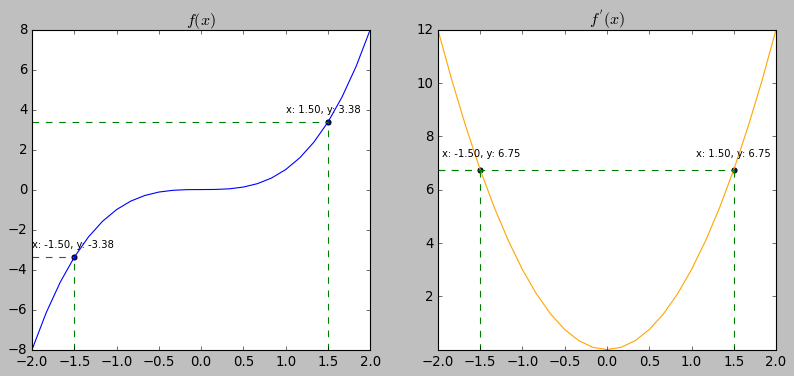

In [7]:
x = np.linspace(-2, 2, 25)
y = cubic(x)
y_deriv = derivative(cubic, x)

# simulation
x_sim = np.array([-1.5, 1.5])
y_sim = cubic(x_sim)
y_deriv_sim = derivative(cubic, x_sim)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# === function ===

axs[0].title.set_text(r"$ f(x) $")

# real x
axs[0].plot(x, y, color='blue')

# sim x
axs[0].scatter(x_sim, y_sim)

# plot sim x
for xsim, ysim in zip(x_sim, y_sim):
    axs[0].annotate("x: {:.2f}, y: {:.2f}".format(xsim, ysim), xy=(xsim-.5, ysim+.5), c='k', fontsize=9)
    axs[0].plot([xsim, xsim], [y.min(), ysim], color='g', linestyle='--')
    axs[0].plot([x.min(), xsim], [ysim, ysim], color='g', linestyle='--')

# limit the plot
axs[0].set_xlim([x.min(), x.max()])
axs[0].set_ylim([y.min(), y.max()])

# === derivative ===

axs[1].title.set_text(r"$ f^{'}(x) $")

# real x
axs[1].plot(x, y_deriv, color='orange')

# sim x
axs[1].scatter(x_sim, y_deriv_sim)

# plot sim x
for xsim, yderivsim in zip(x_sim, y_deriv_sim):
    axs[1].annotate("x: {:.2f}, y: {:.2f}".format(xsim, yderivsim), xy=(xsim-.45, yderivsim+.5), c='k', fontsize=9)
    axs[1].plot([xsim, xsim], [y.min(), yderivsim], color='g', linestyle='--')
    axs[1].plot([x.min(), xsim], [yderivsim, yderivsim], color='g', linestyle='--')

# limit the plot
axs[1].set_xlim([x.min(), x.max()])
axs[1].set_ylim([y_deriv.min(), y_deriv.max()])

plt.show()

### 3. Nested Function (Composite Function)

In [8]:
def f1(x):
    return x + 1

def f2(x):
    return x + 2

output = f2(f1(5))
print("Final Output: ", output)

Final Output:  8


or

In [9]:
# declare Chain type
Function = Callable[[np.ndarray], np.ndarray]
Chain = List[Function]

def chain_length_2(chain: Chain, arr: np.ndarray) -> np.ndarray:
    assert len(chain) == 2, "Length of input 'chain' should be 2"

    f1 = chain[0]
    f2 = chain[1]

    return f2(f1(arr))

# declate the chain
chain = [f1, f2]
arr = np.array([1, 2, 3], dtype=np.int32)

print(chain_length_2(chain, arr))

[4 5 6]


### 4. Chain Rule

analogy:

if goku on earth has power 2x of his original power, then if he move to his own planet (namek :D), goku will gain 4x of his current power. Thus, Goku's total power is 8x now.
the `8x` is our final output, then we want to know, how much power (total power) will goku have if there is any changes of his power on earth at some unit changes?

$ \displaystyle \frac{\Delta total \space power}{\Delta power \space on \space earth} = \frac{\Delta total \space power}{\Delta power \space on \space namek} \times \frac{\Delta power \space on \space namek}{\Delta power \space on \space earth} $

this analogy is an example of composite linear function of:

$ y_1 = f_1(x) = 2x $, then $ y_2 = f_2(y_1) = 4x $, if we try to find the derivative of these functions, then it will be looks like this:

$ f^{'}_1(x) = 2 \times 1 . x^{1-1} = 2 $ and $ f^{'}_2(x) = 4 \times 1 . x^{1-1} = 4 $

then our final equation is:

$ \displaystyle \frac{\Delta total \space power}{\Delta power \space on \space earth} = 2 \times 4 = 8 $ unit


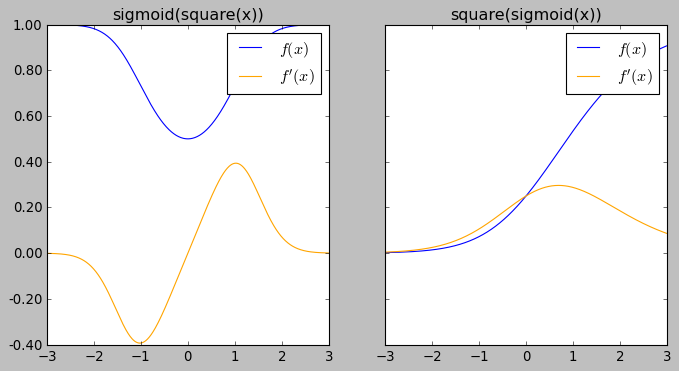

In [10]:
from matplotlib.ticker import FormatStrFormatter

# sigmoid activation function
def sigmoid(x: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-x))

# chain rule
def chain_deriv_2(chain: Chain, input: np.ndarray) -> np.ndarray:
    assert len(chain) == 2, "This function requires 'Chain' objects of length 2"

    assert input.ndim == 1, "Function requires a 1 dimensional ndarray as input"

    f1 = chain[0]
    f2 = chain[1]

    # f1(x)
    f1_of_x = f1(input)

    # df1/du
    df1dx = derivative(f1, input)

    # f2(f1(x))
    f2_of_f1_of_x = f2(f1(input))

    # df2/du(f1(x))
    df2du = derivative(f2, f1(input))

    # multiplying these quantities together at each point
    return df1dx * df2du, f2_of_f1_of_x

PLOT_RANGE = np.arange(-3, 3, 0.01)

chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

derivative_output_1, function_output_1 = chain_deriv_2(chain_1, PLOT_RANGE)
derivative_output_2, function_output_2 = chain_deriv_2(chain_2, PLOT_RANGE)

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

yticks = np.arange(-0.4, 1.2, 0.2, dtype=np.float16)

axs[0].plot(PLOT_RANGE, function_output_1, color='blue', label=r'$f(x)$')
axs[0].plot(PLOT_RANGE, derivative_output_1, color='orange', label=r"$f'(x)$")
axs[0].title.set_text("sigmoid(square(x))")
axs[0].set_ylim(0, 1)
axs[0].yaxis.set_ticks(yticks)
axs[0].yaxis.set_ticklabels(yticks, fontsize=12)
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs[0].legend()

axs[1].plot(PLOT_RANGE, function_output_2, color='blue', label=r'$f(x)$')
axs[1].plot(PLOT_RANGE, derivative_output_2, color='orange', label=r"$f'(x)$")
axs[1].title.set_text("square(sigmoid(x))")
axs[1].legend()

plt.show()

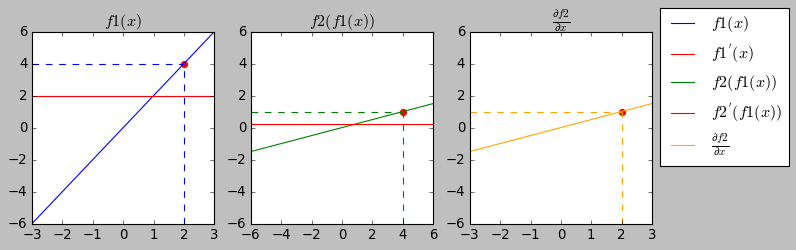

In [11]:
def f1(x):
    return 2 * x

def f2(x):
    return 0.25 * x

### simulation
weight = float(2.0)
height = f1(weight)
shoe_size = f2(height)

x = np.linspace(-3, 3, 20)
y1 = f1(x)
y2 = f2(y1)

y1_deriv = derivative(f1, x)
y2_deriv = derivative(f2, y1)

y_derivative = y2_deriv * y1_deriv * x

fig, axs = plt.subplots(1, 3, figsize=(10, 3), sharey=False)

axs[0].title.set_text(r"$f1(x)$")
axs[0].plot(x, y1, color='b', label=r'$f1(x)$')
axs[0].plot(x, y1_deriv, color='r', label=r"$f1^{'}(x)$")

# plot input simulation
axs[0].scatter(weight, height, color='r', s=30)
axs[0].plot([weight, weight], [y1.min(), height], color='b', linestyle='--')
axs[0].plot([x.min(), weight], [height, height], color='b', linestyle='--')

axs[0].set_xlim(-3, 3)
axs[0].set_ylim(-6, 6)

axs[1].title.set_text(r"$f2(f1(x))$")
axs[1].plot(y1, y2, color='g', label=r'$f2(f1(x))$')
axs[1].plot(y1, y2_deriv, color='r', label=r"$f2^{'}(f1(x))$")

# plot input simulation
axs[1].scatter(height, shoe_size, color='r', s=30)
axs[1].plot([height, height], [-6, shoe_size], color='g', linestyle='--')
axs[1].plot([y1.min(), height], [shoe_size, shoe_size], color='g', linestyle='--')

axs[1].set_xlim(-6, 6)
axs[1].set_ylim(-6, 6)

axs[2].title.set_text(r"$\frac{\partial f2}{\partial x}$")
axs[2].plot(x, y_derivative, color='orange', label=r"$\frac{\partial f2}{\partial x}$")

# plot input simulation
axs[2].scatter(weight, shoe_size, color='r', s=30)
axs[2].plot([weight, weight], [-6, shoe_size], color='orange', linestyle='--')
axs[2].plot([x.min(), weight], [shoe_size, shoe_size], color='orange', linestyle='--')

axs[2].set_xlim(-3, 3)
axs[2].set_ylim(-6, 6)

fig.legend(loc='center left', bbox_to_anchor=(.9, .67))

plt.show()

It was a coincidence that our derivative same with the slop!

$
\displaystyle \frac{\partial f2}{\partial x}(x) = \frac{\partial f2}{\partial u}(f1(x)) \times \frac{\partial f1}{\partial x}(x)
$

$
\displaystyle \frac{\partial f2}{\partial x}(x) = \frac{1}{4} \times 2 = \frac{1}{2} = 0.5
$

simulation of x (input) = 2

$
\displaystyle 0.5 \times x = 0.5 \times 2 = 1
$

A Slightly More Longer Example (3 composite functions)

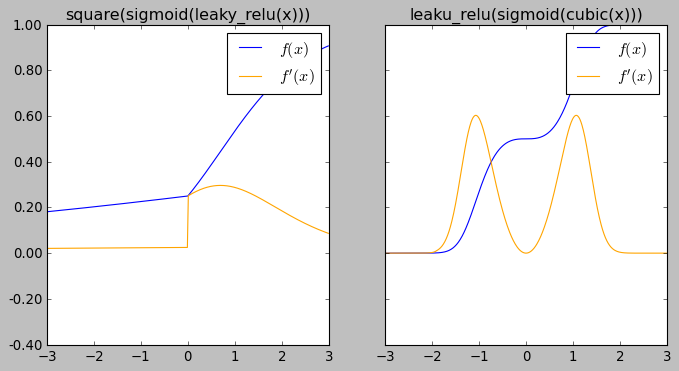

In [12]:
# leaky relu activation function
def leaky_relu(input: np.ndarray) -> np.ndarray:
    alpha = 0.1
    return np.maximum(alpha * input, input)

# chain rule
def chain_deriv_3(chain: Chain, input: np.ndarray) -> np.ndarray:
    assert len(chain) == 3, "This function requires 'Chain' objects of length 2"

    assert input.ndim == 1, "Function requires a 1 dimensional ndarray as input"

    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]

    # f1(x)
    f1_of_x = f1(input)

    # f2(f1(x))
    f2_of_x = f2(f1_of_x)

    # f3(f2(f1(x)))
    f3_of_x = f3(f2_of_x)

    # df3du
    df3du = derivative(f3, f2_of_x)

    # df2du
    df2du = derivative(f2, f1_of_x)

    # df1dx
    df1dx = derivative(f1, input)

    return df3du * df2du * df1dx, f3_of_x

PLOT_RANGE = np.arange(-3, 3, 0.01)

chain_1 = [leaky_relu, sigmoid, square]
chain_2 = [cubic, sigmoid, leaky_relu]

derivative_output_1, function_output_1 = chain_deriv_3(chain_1, PLOT_RANGE)
derivative_output_2, function_output_2 = chain_deriv_3(chain_2, PLOT_RANGE)

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

yticks = np.arange(-0.4, 1.2, 0.2, dtype=np.float16)

axs[0].plot(PLOT_RANGE, function_output_1, color='blue', label=r'$f(x)$')
axs[0].plot(PLOT_RANGE, derivative_output_1, color='orange', label=r"$f'(x)$")
axs[0].set_ylim(0, 1)
axs[0].yaxis.set_ticks(yticks)
axs[0].yaxis.set_ticklabels(yticks, fontsize=12)
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs[0].title.set_text("square(sigmoid(leaky_relu(x)))")
axs[0].legend()

axs[1].plot(PLOT_RANGE, function_output_2, color='blue', label=r'$f(x)$')
axs[1].plot(PLOT_RANGE, derivative_output_2, color='orange', label=r"$f'(x)$")
axs[1].title.set_text("leaku_relu(sigmoid(cubic(x)))")
axs[1].legend()

plt.show()

###  5.Functions with Multiple Inputs

e.g:

inputs:
* $x$
* $y$

the equations:

$ f(x, y) = x + y $

In [13]:
def multiple_input_add(x: np.ndarray,
                       y: np.ndarray,
                       f: Function) -> float:
    assert x.shape == y.shape
    a = x + y
    return f(a)

x = np.array([2])
y = np.array([5])

print(multiple_input_add(x, y, sigmoid))

[0.99908895]


### 6. Derivatives of Functions with Multiple Inputs (Partial Derivative)

long version:

* $ \displaystyle \frac{\partial f}{\partial x} = \frac{\partial \sigma}{\partial u} (\alpha(x,y)) \times \frac{\partial \alpha}{\partial x} ((x, y)) = \frac{\partial \sigma}{\partial u}(x + y) \times \frac{\partial \alpha}{\partial x}((x, y))$

* $ \displaystyle \frac{\partial f}{\partial y} = \frac{\partial \sigma}{\partial u} (\alpha(x,y)) \times \frac{\partial \alpha}{\partial y} ((x, y)) = \frac{\partial \sigma}{\partial u}(x + y) \times \frac{\partial \alpha}{\partial y}((x, y))$

short version:

* $ \displaystyle \frac{\partial \sigma}{\partial x} = \frac{\partial \sigma}{\partial \alpha} \times \frac{\partial \alpha}{\partial x}$

* $ \displaystyle \frac{\partial \sigma}{\partial y} = \frac{\partial \sigma}{\partial \alpha} \times \frac{\partial \alpha}{\partial y}$

Note:

$ \displaystyle \frac{\partial \alpha}{\partial x}, \frac{\partial \alpha}{\partial y} = 1$

In [14]:
def multiple_inputs_add_backward(x: np.ndarray,
                                 y: np.ndarray,
                                 f: Function):
    # compute forward
    a = x + y

    # compute derivative
    dsda = derivative(f, a)

    # derivative of dadx and dady
    dadx, dady = 1, 1

    return dsda * dadx, dsda * dady, f(a)

simulation:

we have input $ x \in \set{v \mid -3 \leq v \leq 3 } $, and $ y = 3 $
So, basically we have data look like this:
$
\set{(-3, 3), (-2, 3), \cdots, (3, 3)}
$

this data could represent the simulation of function with multiple inputs.

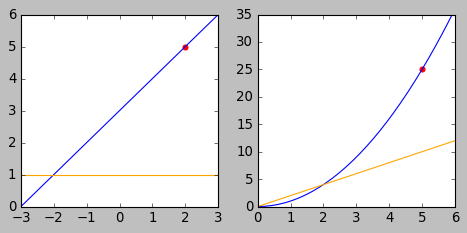

In [15]:
x = np.linspace(-3, 3, 30)
y = np.array([3])

# simulation forward
x_sim = 2
a_sim = x_sim + 3
s_sim = a_sim**2

# simulation backward
dsdx_sim = 2 * (a_sim) * (1 + 0)

dsdx, dsdy, fx = multiple_inputs_add_backward(x, y, square)

fig, axs = plt.subplots(1, 2, figsize=(7, 3))

axs[0].plot(x, (x + y), color='b')
axs[0].plot(x, np.ones(x.shape), color='orange')
axs[0].scatter(x_sim, a_sim, color='r', s=20)
axs[0].set_xlim(-3, 3)
axs[0].set_ylim(0, 6)

axs[1].plot((x + y), fx, color='b')
axs[1].plot((x + y), 2 * (x + y), color='orange')
axs[1].scatter(a_sim, s_sim, color='r', s=20)
axs[1].set_xlim(0, 6)
axs[1].set_ylim(0, 35)

plt.show()

### 7. Functions with Multiple Vector Inputs

A typical way to represent a single data point, or "observation," in a neural network is
as a row with n features, where each feature is simply a number $x_1$, $x_2$, and so on, up to $x_n$:

Features:
$$ X = \begin{bmatrix} x_1 & x_2 & \cdots & x_n \end{bmatrix} $$

A canonical example to keep in mind here is predicting housing prices, which we'll
build a neural network from scratch to do in the next chapter; in this example, $x_1$, $x_2$,
and so on are numerical features of a house, such as its `square footage` or its `proximity to schools`.

Perhaps the single most common operation in neural networks is to form a "weighted
sum" of these features, where the weighted sum could emphasize certain features and
de-emphasize others and thus be thought of as a new feature that itself is just a combination of old features.

Weights:
$$ W = \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_n \end{bmatrix} $$

then we could define the output of this operation as:

$$ N = v(X, W) = X \times W = x_1 . w_1 + x_2 . w_2 + \cdots + x_n . w_n $$

In [16]:
def matmul_forward(X: np.ndarray,
                   W: np.ndarray) -> np.ndarray:
    assert X.shape[1] == W.shape[0], \
    '''
    For matrix multiplication, the number of columns in the first array should
    match the number of rows in the second; instead the number of columns in the
    first array is {0} and the number of rows in the second array is {1}.
    '''.format(X.shape[1], W.shape[0])

    # matrix multiplication
    N = np.dot(X, W)
    return N

### 8. Derivatives of Functions with Multiple Vector Inputs

matrix multipication function: 

$$ X = \begin{bmatrix} x_1 & x_2 & x_3 \end{bmatrix}, Y = \begin{bmatrix} w_1 \\ w_2 \\ w_3 \end{bmatrix} $$

$$ v(X, Y) = x_1 . w_1 \times x_2 . w_2 \times x_3 . w_3 = N $$

the derivation:

$$ \displaystyle \frac{\partial v}{\partial X}, \frac{\partial v}{\partial Y} $$

Calculating these derivatives was easy when we were just dealing with addition and
multiplication, as in the prior examples. But how can we do the analogous thing with
matrix multiplication? To define that precisely, we’ll have to turn to the math

* $$ \frac{\partial v}{\partial X} = \begin{bmatrix} \frac{\partial v}{\partial x1} & \frac{\partial v}{\partial x2} & \frac{\partial v}{\partial x3} \end{bmatrix} $$
* $$ \frac{\partial v}{\partial W} = \begin{bmatrix} \frac{\partial v}{\partial w1} \\ \\ \frac{\partial v}{\partial w2} \\ \\ \frac{\partial v}{\partial w3} \end{bmatrix} $$

we can see that if, for example, $x_1$ changes by ϵ units, then $N$ will change by $w_1$ $\times$ ϵ units, and the same logics applies to the other $x_i$ elements. Thus:

* $$ \frac{\partial v}{\partial x_1} = w_1 $$
* $$ \frac{\partial v}{\partial x_2} = w_2 $$
* $$ \frac{\partial v}{\partial x_3} = w_3 $$

And, so:

$$ \frac{\partial v}{\partial X} = \begin{bmatrix} w_1 & w_2 & w_3 \end{bmatrix} = W^T $$

This is a surprising and elegant result that turns out to be a key piece of the puzzle to understanding both why deep learning works and how it can be implemented so cleanly.
Using similar reasoning, we can see that:

$$ \frac{\partial v}{\partial W} = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} = X^T $$

In [17]:
import plotly.graph_objects as go

x = np.linspace(-3, 3, 30)
y = np.linspace(1, 3, 30)
x, y = np.meshgrid(x, y)
z = square(x + y)
z_deriv = 2 * (x + y) * 1

fig = go.Figure(data=[
        go.Surface(z=z, x=x, y=y, colorscale="Portland"),
        go.Surface(z=z_deriv, x=x, y=y, colorscale=[[0, "rgb(100, 254, 100)"], [1, "rgb(100, 254, 100)"]], showscale=False, opacity=0.50)
    ])
fig.update_layout(title='Square(x + y)', autosize=False, coloraxis_showscale=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

A straightforward `exercise` for the reader is to modify this for the case where x and y
are `multiplied` instead of added.

Next, we’ll examine a more complicated example that more closely mimics what happens in deep learning: a similar function to the previous example, but with two vector
inputs.

In [18]:
import plotly.graph_objects as go

x = np.linspace(-3, 3, 30)
y = np.linspace(1, 3, 30)
x, y = np.meshgrid(x, y)
z = cubic(x * y)
z_deriv = 3 * ((x * y)**2) * y # 3*x^2*y

fig = go.Figure(data=[
        go.Surface(z=z, x=x, y=y, colorscale="Portland"),
        go.Surface(z=z_deriv, x=x, y=y, colorscale=[[0, "rgb(100, 254, 100)"], [1, "rgb(100, 254, 100)"]], showscale=False, opacity=0.50)
    ])
fig.update_layout(title='Square(x * y)', autosize=False, coloraxis_showscale=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [19]:
def matmul_backward_first(X: np.ndarray,
                          W: np.ndarray) -> np.ndarray:
    '''
    Computes the backward pass of a matrix multiplication with respect to the
    first argument.
    '''
    # backward pass
    dNdX = np.transpose(W, (1, 0))
    return dNdX

### 9. Vector Functions and Their Derivatives: One Step Further

Mathematically, this is stright-forward as well:

$ s = f(X, W) = \sigma (v(X, W)) = \sigma (x_1 . w_1 + x_2 . w_2 + x_3 . w_3) $

Finally, we can code this function up as:

In [20]:
def matrix_forward_extra(X: np.ndarray,
                         W: np.ndarray,
                         sigma: Function):
    
    assert X.shape[1] == W.shape[0]

    N = np.dot(X, W)
    S = sigma(N)

    return S

### 10. Vector Functions and Their Derivatives: The Backward Pass

Since $ f(X, W) $ is a nested function, so, its derivative with respect to X should conceptually be:

$ \displaystyle \frac{\partial f}{\partial X} =  \frac{\partial \sigma}{\partial u} (v(X, W)) \times \frac{\partial v}{\partial X} (X, W) $

but, the first part of this simply:


$ \displaystyle  \frac{\partial \sigma}{\partial u} (v(X, W)) = \frac{\partial \sigma}{\partial u}(x_1 . w_1 + x_2 . w_2 + x3 . w3) $

`The final equation`:

$ \displaystyle \frac{\partial f}{\partial X} =  \frac{\partial \sigma}{\partial u} (v(X, W)) \times \frac{\partial v}{\partial X} (X, W) = \frac{\partial \sigma}{\partial u}(x_1 . w_1 + x_2 . w_2 + x3 . w3) \times W^{T}$

In [21]:
def matrix_function_backward_1(X: np.ndarray,
                               W: np.ndarray,
                               sigma: Function) -> np.ndarray:
    assert X.shape[1] == W.shape[0]

    # matrix multiplication
    N = np.dot(X, W)

    # feeding the output of the matrix multiplication through sigma
    S = sigma(N)

    # backward calculation
    dSdN = derivative(sigma, N)

    # dNdX
    dNdX = np.transpose(W, (1, 0))

    # multiply them together; since dNdX is 1x1 here, order doesn't matter
    return np.dot(dSdN, dNdX)

Simple simulation:

In [22]:
np.random.seed(42)
X = np.array([[0.4723, 0.6151, -1.7262]])
Y = np.random.rand(3, 1)

gradient = matrix_function_backward_1(X, Y, sigmoid)

print(gradient)

[[0.08797754 0.22331789 0.1719416 ]]


In [23]:
X[0][2] += 0.01

gradient = matrix_function_backward_1(X, Y, sigmoid)

print(gradient)

[[0.08813487 0.22371724 0.17224908]]


### 11. Computational Graph with 2D Matrix Inputs.

This leads us to a subtle but important idea: we may perform whatever series of oper‐
ations on multidimensional arrays we want, but for the notion of a "`gradient`" with
respect to some output to be well defined, we need to sum (or otherwise `aggregate`
into a single number) the final array in the sequence so that the notion of “"ow much
will changing each element of X `affect the output1`" will even make sense.

Let say:

$
X = \begin{bmatrix} x_{11} & x_{12} & x_{13} \\ x_{21} & x_{22} & x_{23} \\ x_{31} & x_{32} & x_{33} \end{bmatrix}, W = \begin{bmatrix} w_{11} & w_{12} \\ w_{21} & w_{22} \\ w_{31} & w_{32} \end{bmatrix}
$

$
N = X \times W =  \begin{bmatrix} 
    x_{11} \times w_{11} + x_{12} \times w_{21} + x_{13} \times w_{31} & x_{11} \times w_{12} + x_{12} \times w_{22} + x_{13} \times w_{32} \\
    x_{21} \times w_{11} + x_{22} \times w_{21} + x_{23} \times w_{31} & x_{21} \times w_{12} + x_{22} \times w_{22} + x_{23} \times w_{32} \\
    x_{31} \times w_{11} + x_{32} \times w_{21} + x_{33} \times w_{31} & x_{31} \times w_{12} + x_{32} \times w_{22} + x_{33} \times w_{32} \\
\end{bmatrix} = \begin{bmatrix}
    v(XW_{11}) & v(XW_{12}) \\
    v(XW_{21}) & v(XW_{22}) \\
    v(XW_{31}) & v(XW_{32}) \\
\end{bmatrix}
$

now, we apply sigma:

$
S = \begin{bmatrix} 
    \sigma(x_{11} \times w_{11} + x_{12} \times w_{21} + x_{13} \times w_{31}) & \sigma(x_{11} \times w_{12} + x_{12} \times w_{22} + x_{13} \times w_{32}) \\
    \sigma(x_{21} \times w_{11} + x_{22} \times w_{21} + x_{23} \times w_{31}) & \sigma(x_{21} \times w_{12} + x_{22} \times w_{22} + x_{23} \times w_{32}) \\
    \sigma(x_{31} \times w_{11} + x_{32} \times w_{21} + x_{33} \times w_{31}) & \sigma(x_{31} \times w_{12} + x_{32} \times w_{22} + x_{33} \times w_{32}) \\
\end{bmatrix} = \begin{bmatrix}
    \sigma(v(XW_{11})) && \sigma(v(XW_{12})) \\
    \sigma(v(XW_{21})) && \sigma(v(XW_{22})) \\
    \sigma(v(XW_{31})) && \sigma(v(XW_{32})) \\
\end{bmatrix}
$

finally, we can easily sum up these elements:

$
L = \Lambda(\sigma(X \times W)) = \Lambda \left( \begin{bmatrix}
    \sigma(v(XW_{11})) && \sigma(v(XW_{12})) \\
    \sigma(v(XW_{21})) && \sigma(v(XW_{22})) \\
    \sigma(v(XW_{31})) && \sigma(v(XW_{32})) \\
\end{bmatrix} \right) = \sigma(v(XW_{11})) + \sigma(v(XW_{12})) + \sigma(v(XW_{21})) + \sigma(v(XW_{22})) + \sigma(v(XW_{31})) + \sigma(v(XW_{32}))
$

In [24]:
def matrix_function_forward_sum(X: np.ndarray,
                                W: np.ndarray,
                                sigma: Function) -> float:
    assert X.shape[1] == W.shape[0]

    N = np.dot(X, W)

    S = sigma(N)

    L = np.sum(S)

    return L

### The Fun Part: The Backward Pass

The Math:

$
\displaystyle \frac{\partial \Lambda}{\partial X}(X) = \frac{\partial v}{\partial X}(X, W) \times \frac{\partial \sigma}{\partial u}(N) \times \frac{\partial \Lambda}{\partial u}(S)
$

The first derivative is the most straightforward and thus makes the best warm-up. We
want to know how much L (the output of Λ) will increase if each element of S increases. 
`Since L is the sum of all the elements of S` (linear rule: where derivative of $x$ is 1), this derivative is simply:

$
\displaystyle \frac{\partial \Lambda}{\partial u}(S) = \begin{bmatrix} 
    1 & 1 \\
    1 & 1 \\
    1 & 1
\end{bmatrix}
$

since increasing any element of S by, say, 0.46 units would increase $\Lambda$ by 0.46 units.

Next, we have $\frac{\partial \sigma}{\partial u}(N)$ . This is simply the derivative of whatever function $\sigma$ is, evaluated
at the elements in N. In the "XW" syntax we’ve used previously, this is again simple to
compute:

$ \displaystyle
\frac{\partial \sigma}{\partial u}(N) = \begin{bmatrix}
    \frac{\partial \sigma}{\partial u}(v(XW_{11})) & \frac{\partial \sigma}{\partial u}(v(XW_{12})) \\
    \frac{\partial \sigma}{\partial u}(v(XW_{21})) & \frac{\partial \sigma}{\partial u}(v(XW_{22})) \\
    \frac{\partial \sigma}{\partial u}(v(XW_{31})) & \frac{\partial \sigma}{\partial u}(v(XW_{32})) \\
\end{bmatrix}
$

Note that at this point we can say for certain that we can multiply these two derivatives together `elementwise` and compute $\frac{\partial \Lambda}{\partial u}(N)$:

$
\frac{\partial \sigma}{\partial u}(N) \times \frac{\partial \Lambda}{\partial u}(S) = \begin{bmatrix}
    \frac{\partial \sigma}{\partial u}(v(XW_{11})) & \frac{\partial \sigma}{\partial u}(v(XW_{12})) \\
    \frac{\partial \sigma}{\partial u}(v(XW_{21})) & \frac{\partial \sigma}{\partial u}(v(XW_{22})) \\
    \frac{\partial \sigma}{\partial u}(v(XW_{31})) & \frac{\partial \sigma}{\partial u}(v(XW_{32})) \\
\end{bmatrix} \times \begin{bmatrix} 
    1 & 1 \\
    1 & 1 \\
    1 & 1
\end{bmatrix} = \begin{bmatrix}
    \frac{\partial \sigma}{\partial u}(v(XW_{11})) & \frac{\partial \sigma}{\partial u}(v(XW_{12})) \\
    \frac{\partial \sigma}{\partial u}(v(XW_{21})) & \frac{\partial \sigma}{\partial u}(v(XW_{22})) \\
    \frac{\partial \sigma}{\partial u}(v(XW_{31})) & \frac{\partial \sigma}{\partial u}(v(XW_{32})) \\
\end{bmatrix}
$

Now what is $ \displaystyle \frac{\partial v}{\partial X}(X, W) $ ?

$
\displaystyle \frac{\partial v}{\partial X}(X, W) = W^{T}
$

where does it came from?

$
X = \begin{bmatrix} x_{11} & x_{12} & x_{13} \\ x_{21} & x_{22} & x_{23} \\ x_{31} & x_{32} & x_{33} \end{bmatrix}, W = \begin{bmatrix} w_{11} & w_{12} \\ w_{21} & w_{22} \\ w_{31} & w_{32} \end{bmatrix}
$

now, focus on this simple example:

$
N = X \times W =  \begin{bmatrix} 
    x_{11} \times w_{11} + x_{12} \times w_{21} + x_{13} \times w_{31} & . \\
    . & . \\
    . & . \\
\end{bmatrix} = \begin{bmatrix}
    v(XW_{11}) & . \\
    . & . \\
    . & . \\
\end{bmatrix}
$

$
\displaystyle \frac{\partial N_{11}}{\partial X} = \begin{bmatrix}
    \frac{\partial N_{11}}{\partial x_{11}} & \frac{\partial N_{11}}{\partial x_{12}} & \frac{\partial N_{11}}{\partial x_{13}} \\ \\
    \frac{\partial N_{11}}{\partial x_{21}} & \frac{\partial N_{11}}{\partial x_{22}} & \frac{\partial N_{11}}{\partial x_{23}} \\ \\
    \frac{\partial N_{11}}{\partial x_{31}} & \frac{\partial N_{11}}{\partial x_{32}} & \frac{\partial N_{11}}{\partial x_{33}} \\
\end{bmatrix}
$

take an example, if we want to find the derivative of $N_{11}$ w.r.t to $x_{11}$ then it would be:

$
\begin{bmatrix}
    w_{11} & 0 & 0 \\
    0 & 0 & 0 \\
    0 & 0 & 0
\end{bmatrix}
$

$N_{11}$ w.r.t to $x_{12}$:

$
\begin{bmatrix}
    0 & w_{21} & 0 \\
    0 & 0 & 0 \\
    0 & 0 & 0
\end{bmatrix}
$

$N_{11}$ w.r.t to $x_{13}$:

$
\begin{bmatrix}
    0 & 0 & w_{31} \\
    0 & 0 & 0 \\
    0 & 0 & 0
\end{bmatrix}
$

$
\vdots
$

$N_{32}$ w.r.t to $x_{33}$:

$
\begin{bmatrix}
    0 & 0 & 0 \\
    0 & 0 & 0 \\
    0 & 0 & w_{32}
\end{bmatrix}
$

thus, we only found that which variables are cause the results:

$
\begin{bmatrix}
    w_{11} & w_{21} & w_{31} \\
    w_{12} & w_{22} & w_{32}
\end{bmatrix}
$

final formula:

$
\displaystyle \frac{\partial \Lambda}{\partial X}(X) = \begin{bmatrix}
    \frac{\partial \sigma}{\partial X_{1j}}(XW_{11}) & \frac{\partial \sigma}{\partial X_{1j}}(XW_{12}) \\
    \frac{\partial \sigma}{\partial X_{2j}}(XW_{21}) & \frac{\partial \sigma}{\partial X_{2j}}(XW_{22}) \\
    \frac{\partial \sigma}{\partial X_{3j}}(XW_{31}) & \frac{\partial \sigma}{\partial X_{3j}}(XW_{32}) \\
\end{bmatrix} \times \begin{bmatrix}
    w_{11} & w_{21} & w_{31} \\
    w_{12} & w_{22} & w_{32}
\end{bmatrix}
$